In [1]:
import requests
import csv
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import re
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_csv(r'C:\Users\HP\Downloads\final_data.csv')
#print(df.shape)

(37850, 2)


In [3]:
#df[df.duplicated('reviews')].shape

(29237, 2)

In [4]:
#df.drop_duplicates(inplace=True)

In [6]:
#print(df.shape)

(8695, 2)


In [7]:
#df.to_csv("CleanedData.csv", index=False)

In [13]:
#df1 = pd.read_csv(r'C:\Users\HP\CleanedData.csv')
p#rint(df.shape)

(4915, 12)


In [14]:
#df2 = pd.read_csv(r'C:\Users\HP\Downloads\amazon_reviews.csv')
#print(df.shape)

(4915, 12)


In [2]:
df3 = pd.read_csv('Dataset-SA.csv')
print(df3.shape)

(205052, 6)


In [3]:
df3=df3.drop(['product_name','product_price', 'Review'],axis=1)

In [5]:
# Define the classes you want to drop randomly
#classes_to_drop = ["positive", "negative", "neutral"]

# Filter the DataFrame to exclude the rows with the specified classes
#df_filtered = df3[~df3["Sentiment"].isin(classes_to_drop)]
#print(df_filtered.shape)

# Randomly sample 54,000 rows from the filtered DataFrame
#df_random_sample = df_filtered.sample(n=54000, random_state=42)

# Drop the randomly sampled rows from the original DataFrame
#df_dropped = df.drop(df_random_sample.index)

# df_dropped now contains the original DataFrame without the randomly dropped rows

#3 dataframes, train test split(10:90) stratify

(0, 3)


use 3 dataframes, train test split(10:90) stratify

In [7]:
# Initialize the sentiment analyzer
#sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each review
#sentiments = []
#for review in df['reviews']:
#    sentiment = sia.polarity_scores(review)['compound']
 #   sentiments.append(sentiment)


# Create a new column for sentiments based on star ratings
#df['sentiment'] = pd.cut(df['ratings'], bins=[0, 2.9, 3.1, 5], labels=['negative', 'neutral', 'positive'])

# Print the updated DataFrame
#print(df)

                                                 reviews  ratings sentiment
0      Review after 1 month.Best in performance!Pros-...        5  positive
1      Voltas - Damn good AC for the 10x10 room , it ...        5  positive
2      I bought this one 15 days ago for 32850 rs wit...        4  positive
3      I could say that voltas provides you best AC a...        4  positive
4      Biggest Fraud I have ever encountered by Flipk...        1  negative
...                                                  ...      ...       ...
37845  After 2 months of use.. Tab is good for book r...        3   neutral
37846  Nice real me pad, good looking.,,, dolby digit...        5  positive
37847  Value for money 👍Ram management is okHighly se...        5  positive
37848  Brought for watching movies on OTT Over all su...        5  positive
37849        Nice product and vry smoothly workREAD MORE        5  positive

[37850 rows x 3 columns]


In [6]:
#print(sentiments)

[0.9215, 0.7867, 0.3182, 0.743, -0.9136, -0.9057, 0.9422, 0.0, 0.8442, 0.9275, 0.8024, 0.6873, -0.3664, 0.6997, 0.8834, 0.936, 0.8393, 0.8962, 0.3602, 0.8248, 0.7003, -0.7861, 0.8316, 0.0, 0.8835, -0.5859, -0.6652, -0.5859, 0.34, 0.6249, -0.5849, 0.5244, 0.6369, 0.2023, -0.3612, 0.6369, 0.0, 0.0, -0.5106, 0.0, 0.5994, 0.6369, -0.6249, 0.5574, 0.7939, 0.4215, 0.6997, 0.5994, 0.3226, 0.5859, 0.7783, 0.0516, 0.5719, -0.5727, 0.5473, 0.4754, 0.0, 0.0, -0.296, -0.0274, 0.0, 0.5106, 0.4404, -0.7089, 0.7841, 0.4215, 0.0, 0.8144, 0.7604, 0.34, -0.3724, -0.4404, 0.4404, -0.5242, 0.4215, 0.5637, 0.8653, 0.8248, 0.7351, 0.4927, 0.3612, 0.7003, 0.0, -0.7148, 0.0, 0.6369, 0.5505, 0.0432, -0.6249, 0.0, 0.6124, 0.4927, 0.6249, 0.0, 0.5719, 0.7496, 0.4939, 0.6908, 0.0, 0.9379, 0.6369, 0.9186, -0.296, 0.4754, 0.6249, 0.0, 0.8251, 0.2382, 0.4404, 0.0, 0.765, 0.6983, 0.4927, -0.5849, -0.296, 0.6249, -0.353, 0.6369, 0.4728, 0.0, 0.0, 0.6369, 0.4404, 0.0276, 0.6249, 0.3818, 0.4927, 0.4404, 0.6249, 0.875, 0

mapping dictionaries
keys as values(1,2,3,4,5)
1=negative
2=negative...
use map function

In [4]:
print(df3["Sentiment"].value_counts())

positive    166581
negative     28232
neutral      10239
Name: Sentiment, dtype: int64


In [4]:
""""
# Count the number of rows with each sentiment value
sentiment_counts = df3["Sentiment"].value_counts()

# Define the number of rows to remove for each sentiment
rows_to_remove = 5000

# Create a mask for rows to be removed for each sentiment
positive_mask = df3[df3["Sentiment"] == "positive"]
negative_mask = df3[df3["Sentiment"] == "negative"]
neutral_mask = df3[df3["Sentiment"] == "neutral"]

# Sample rows to be removed for each sentiment category
positive_to_remove = positive_mask.sample(n=rows_to_remove)
negative_to_remove = negative_mask.sample(n=rows_to_remove)
neutral_to_remove = neutral_mask.sample(n=rows_to_remove)

# Concatenate all the rows to be removed
rows_to_remove = pd.concat([positive_to_remove, negative_to_remove, neutral_to_remove])

# Drop the rows to be removed from the original DataFrame
df_filtered = df3.drop(rows_to_remove.index)

# Save the filtered DataFrame to a new CSV file
filtered_file_path = "Filtered-Dataset-SA.csv"
df_filtered.to_csv(filtered_file_path, index=False)

# Display the summary of the filtered DataFrame
print(df_filtered["Sentiment"].value_counts())

positive    161581
negative     23232
neutral       5239
Name: Sentiment, dtype: int64


In [5]:
""""
positive_to_remove.shape

(5000, 3)

In [6]:
df3['Sentiment'].value_counts()

positive    166581
negative     28232
neutral      10239
Name: Sentiment, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

big, smaller= train_test_split(df3, test_size = 0.1, random_state = 1, stratify = df3['Sentiment'])

In [8]:
smaller['Sentiment'].value_counts(normalize=True)

positive    0.812396
negative    0.137667
neutral     0.049937
Name: Sentiment, dtype: float64

In [8]:
# Shuffle the DataFrame to randomize the rows
df_shuffled = df3.sample(frac=0.1, random_state=42)
# dfp = df[df['Sentiment'] == 'Positive']

# Define the number of rows to remove
rows_to_remove = 180000

# Drop the specified number of rows from the DataFrame
df_filtered = df_shuffled.iloc[rows_to_remove:]

# Save the filtered DataFrame to a new CSV file
filtered_file_path = "Filtered-Dataset-SA.csv"
df_filtered.to_csv(filtered_file_path, index=False)

# Display the summary of the filtered DataFrame
print(df_filtered["Sentiment"].value_counts())

Series([], Name: count, dtype: int64)


In [9]:
df_shuffled.shape

(20505, 3)

In [10]:
df_shuffled['Sentiment'].value_counts()

Sentiment
positive    16669
negative     2787
neutral      1049
Name: count, dtype: int64

In [4]:
print(df3.shape)

(205052, 3)


In [16]:
print(df_filtered.shape)

(0, 3)


In [5]:
# Define the number of rows to remove (replace 'n' with the desired number)
n_rows_to_remove = 180000

# Drop 'n' number of rows from the DataFrame
df_filtered = df3.iloc[n_rows_to_remove:]

# Save the updated DataFrame to a new CSV file
filtered_file_path = "filtered_file.csv"
df_filtered.to_csv(filtered_file_path, index=False)

print(f"{n_rows_to_remove} rows have been dropped from the CSV file.")


180000 rows have been dropped from the CSV file.


In [6]:
df = pd.read_csv(r'C:\Users\HP\filtered_file.csv')
print(df.shape)

(25052, 3)


In [11]:
df.isnull().any()

Rate         False
Summary      False
Sentiment    False
dtype: bool

In [12]:
#remove punctuations
import string
def rmv_punc(text):
  punct = string.punctuation
  return text.translate(str.maketrans('', '', punct))

In [13]:
df['Summary'] = df['Summary'].apply(lambda x: rmv_punc(x))

In [17]:
#remove character with undefined name
def rmv_char(text):
  text = re.sub('[^a-zA-Z0-9]',' ', text)
  text = re.sub('\s+',' ', text) #remove whitespace
  return text

In [18]:
df['Summary'] = df['Summary'].apply(lambda x: rmv_char(x).lower())
df['Sentiment'] = df['Sentiment'].apply(lambda x:str(x).lower())

In [19]:
df.head()

,Rate,Summary,Sentiment
0,5,i will clear your doubtsgo for itbest suitable...,negative
1,4,product is very nice but the size is small the...,positive
2,5,very nice sofa for 1 to 2 years baby,positive
3,5,awesome quality must buy best in the market,positive
4,5,very nice product and comfortable thank you fl...,positive


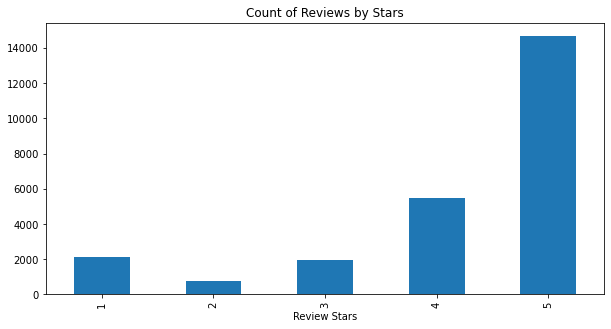

In [22]:
ax = df['Rate'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()